## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [8]:
import os
from tensorflow import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from tensorflow.keras.layers import Dropout

#建立神經網路，並加入 dropout layer
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
#設定超參數
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25,0.5,0.75]

In [14]:
results={}
for drop_ratio in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "drop-%s" % str(drop_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0     

50000/50000 [==============================] - 17s 348us/sample - loss: 1.4947 - accuracy: 0.4613 - val_loss: 1.4326 - val_accuracy: 0.4885
Epoch 46/50
50000/50000 [==============================] - 18s 351us/sample - loss: 1.4978 - accuracy: 0.4641 - val_loss: 1.4794 - val_accuracy: 0.4704
Epoch 47/50
50000/50000 [==============================] - 17s 333us/sample - loss: 1.4943 - accuracy: 0.4631 - val_loss: 1.4857 - val_accuracy: 0.4706
Epoch 48/50
50000/50000 [==============================] - 16s 322us/sample - loss: 1.4896 - accuracy: 0.4653 - val_loss: 1.4475 - val_accuracy: 0.4915
Epoch 49/50
50000/50000 [==============================] - 16s 321us/sample - loss: 1.4890 - accuracy: 0.4630 - val_loss: 1.4548 - val_accuracy: 0.4866
Epoch 50/50
50000/50000 [==============================] - 16s 323us/sample - loss: 1.4853 - accuracy: 0.4656 - val_loss: 1.4387 - val_accuracy: 0.4935
Model: "model_1"
_________________________________________________________________
Layer (type)     

50000/50000 [==============================] - 16s 329us/sample - loss: 1.9394 - accuracy: 0.2712 - val_loss: 1.9973 - val_accuracy: 0.2743
Epoch 40/50
50000/50000 [==============================] - 16s 326us/sample - loss: 1.9413 - accuracy: 0.2697 - val_loss: 2.0018 - val_accuracy: 0.2692
Epoch 41/50
50000/50000 [==============================] - 16s 319us/sample - loss: 1.9384 - accuracy: 0.2683 - val_loss: 1.9830 - val_accuracy: 0.2864
Epoch 42/50
50000/50000 [==============================] - 16s 322us/sample - loss: 1.9389 - accuracy: 0.2702 - val_loss: 1.9743 - val_accuracy: 0.2824
Epoch 43/50
50000/50000 [==============================] - 16s 321us/sample - loss: 1.9420 - accuracy: 0.2686 - val_loss: 1.9818 - val_accuracy: 0.2795
Epoch 44/50
50000/50000 [==============================] - 17s 338us/sample - loss: 1.9350 - accuracy: 0.2727 - val_loss: 2.0220 - val_accuracy: 0.2678
Epoch 45/50
50000/50000 [==============================] - 16s 315us/sample - loss: 1.9405 - accurac

50000/50000 [==============================] - 16s 315us/sample - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 29/50
50000/50000 [==============================] - 16s 319us/sample - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 30/50
50000/50000 [==============================] - 16s 324us/sample - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 31/50
50000/50000 [==============================] - 16s 322us/sample - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 32/50
50000/50000 [==============================] - 16s 322us/sample - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 33/50
50000/50000 [==============================] - 16s 324us/sample - loss: 2.3027 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 34/50
50000/50000 [==============================] - 16s 325us/sample - loss: 2.3027 - accurac

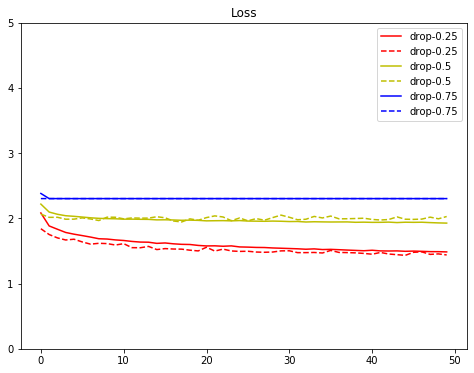

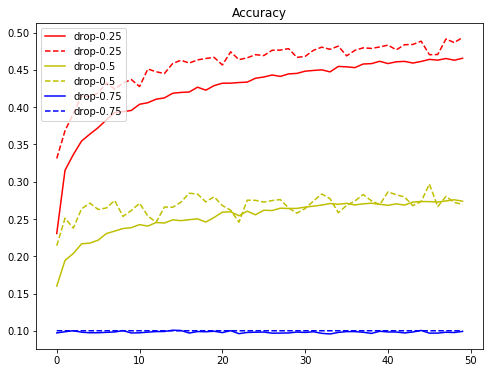

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "y", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()